# Clustering - Clustering jerarquico y dendrogramas con scipy

Se ha aprovechado el código de generación de scattersplots en un proceso de clustering jerárquico con scipy para generar dendrogramas avanzados. El primer bloque es el de confección de un dataset relleno de datos aleatorios distribuidos mediante normales multivariantes; el segundo el de su clusterización y representación y el tercero el de la generación de dendrogramas a partir del mismo dataset.

In [75]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# BLOQUE 1: GENERACIÓN DEL DATASET

In [76]:
# establecimiento de la semilla
np.random.seed(4711)

In [77]:
# distribución a: normal multivariante: en varias dimensiones
# normal centrada en x=10, y=0 con una desviación típica de 3 puntos en horizontal y 4 en vertical
mean_a = [10, 0]
covariance_a = [[3, 1], [1, 4]]
a = np.random.multivariate_normal(mean_a, covariance_a , size=[100,])
# comprobación: quince primeras muestras
a[:15]

array([[ 9.21188389, -0.15188589],
       [ 8.88937431, -0.33937464],
       [10.76840064,  2.95244645],
       [ 8.24213268,  1.29094802],
       [ 5.7967009 , -5.83776714],
       [ 6.3499309 ,  0.63959515],
       [ 8.1057123 , -0.45887277],
       [ 8.72084884, -4.40444487],
       [ 8.83500513, -0.3916611 ],
       [10.4006121 ,  2.71240817],
       [11.95503402,  1.98602715],
       [ 8.5014185 ,  0.50349583],
       [ 9.2335919 ,  1.30693205],
       [12.27768001,  1.62763958],
       [10.95901841, -0.12752032]])

In [78]:
# distribución b: normal multivariante centrada en x=0, y=20 con desviación típica de 3 puntos en horizontal y 4 en vertical
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
# comprobación: quince primeras filas
b[:15]

array([[ 0.79934286, 19.28762072],
       [-0.84336487, 19.14768305],
       [ 2.68289165, 20.28231698],
       [-1.9257809 , 16.28116282],
       [ 0.06693313, 23.13071039],
       [ 1.42543381, 20.57584205],
       [ 0.89064331, 20.85059428],
       [ 0.46997991, 19.45691532],
       [ 0.6414693 , 21.89409115],
       [ 0.83047721, 17.35919757],
       [-0.1872306 , 18.88186529],
       [-2.84504245, 18.3016817 ],
       [-0.0786518 , 21.50770814],
       [ 0.62828334, 17.45787197],
       [ 2.02317907, 22.44786543]])

In [79]:
# creación del array X mediante rellenado aleatorio de muestras
X = np.concatenate([a, b])
# comprobación: 150 muestras bidimensional
X.shape

(150, 2)

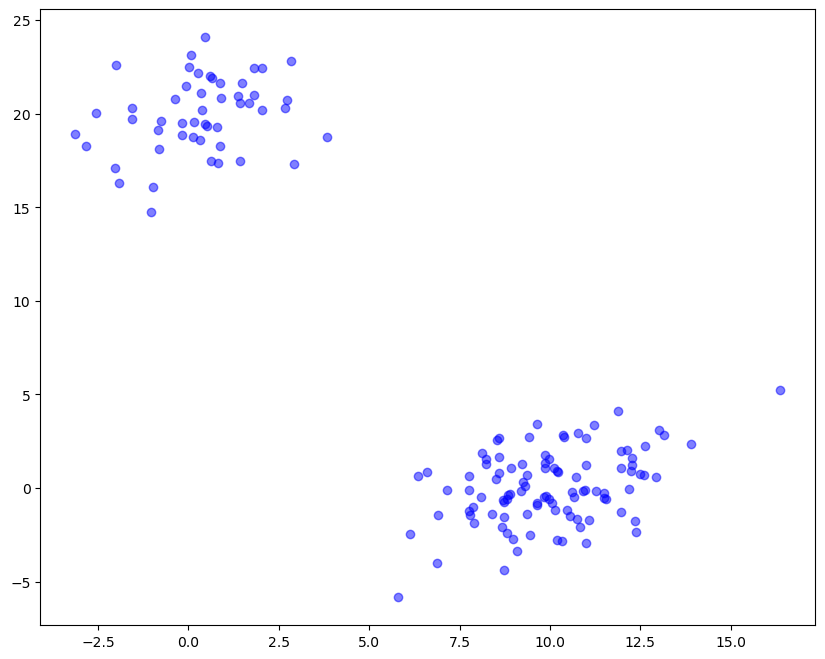

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(x=X[:,0], y=X[:,1], alpha=0.5, c='b')
plt.show()

# BLOQUE 2: CLUSTERING Y REPRESENTACIÓN DEL PRIMER AGRUPAMIENTO

#### Clustering jerárquico con el dataset generado

In [81]:
# matriz de uniones/clusters
Z = linkage(y=X, method='ward', metric='euclidean')
'''
Comprobación de los clusters: las dos primeras columnas son los índices de las muestras agrupadas,
la tercera la distancia y la cuarta el número de muestras agrupadas.
Un índice superior al número máximo de muestras del dataset significa un cluster que ha agrupado a dos muestras iniciales
ya agrupadas con una tercera, formando un cluster de clusters.
'''
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [82]:
# Comprobación de qué muestras conforman un cluster de clusters: Z[índice del cluster de clusters - longitud del dataset original]
# Mirando la matriz de clusters, se observa que el índice 151 está compuesto, entonces, por 
print(Z[151-len(X)])
print('Cluster con índice 151: muestra con índice 14 + muestra con índice 79')

[1.40000000e+01 7.90000000e+01 5.91375926e-02 2.00000000e+00]
Cluster con índice 151: muestra con índice 14 + muestra con índice 79


#### Scatter de las muestras más cercanas/primeros clusters

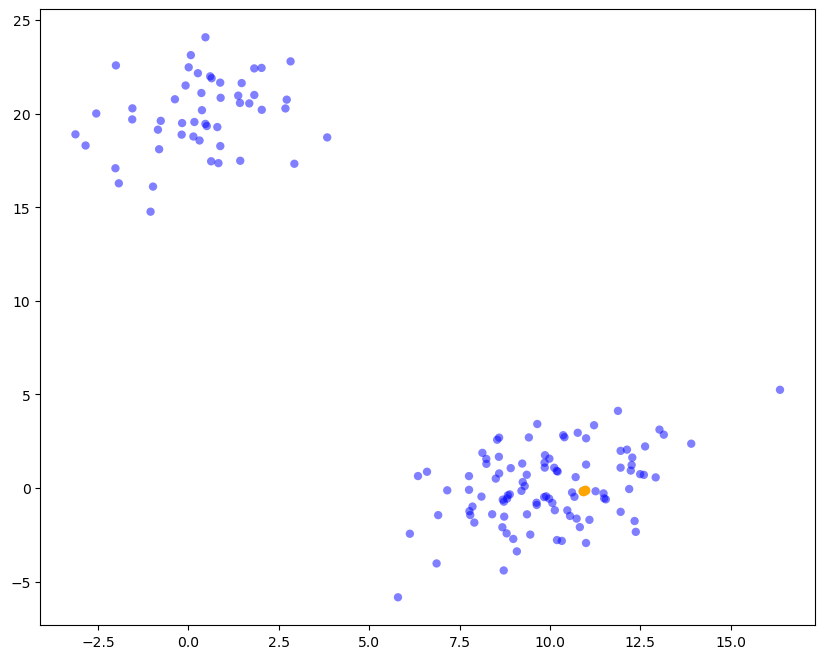

In [83]:
index = [14, 79]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], alpha=0.5, c='b', edgecolors='none') # scatter de todas las muestras
plt.scatter(X[index,0], X[index,1], c='orange') # scatter de los primeros puntos agrupados
plt.show()

#### Coeficiente de correlacion cofenético

En qué medida representa la estructura final de clusters obtenida las similitudes o diferencias entre las muestras originales.

Dicho coeficiente mide la correlación entre las distancias iniciales, tomadas a partir de los datos originales, y las distancias finales con las cuales las muestras se han unido durante el desarrollo del agrupamiento. Un valor igual a uno para tal coeficiente significa que durante el proceso no ha ocurrido perturbación en lo que concierne a la estructura original de los datos y la estructura final presevará totalmente las relaciones topológicas entre las muestras originales; cero equivale a una perturbación total.

In [84]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [85]:
# cálculo del coeficiente cofenético: comparación entre el array de links Z y las distancias de los datos originales X
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

# BLOQUE 3: DENDROGRAMAS

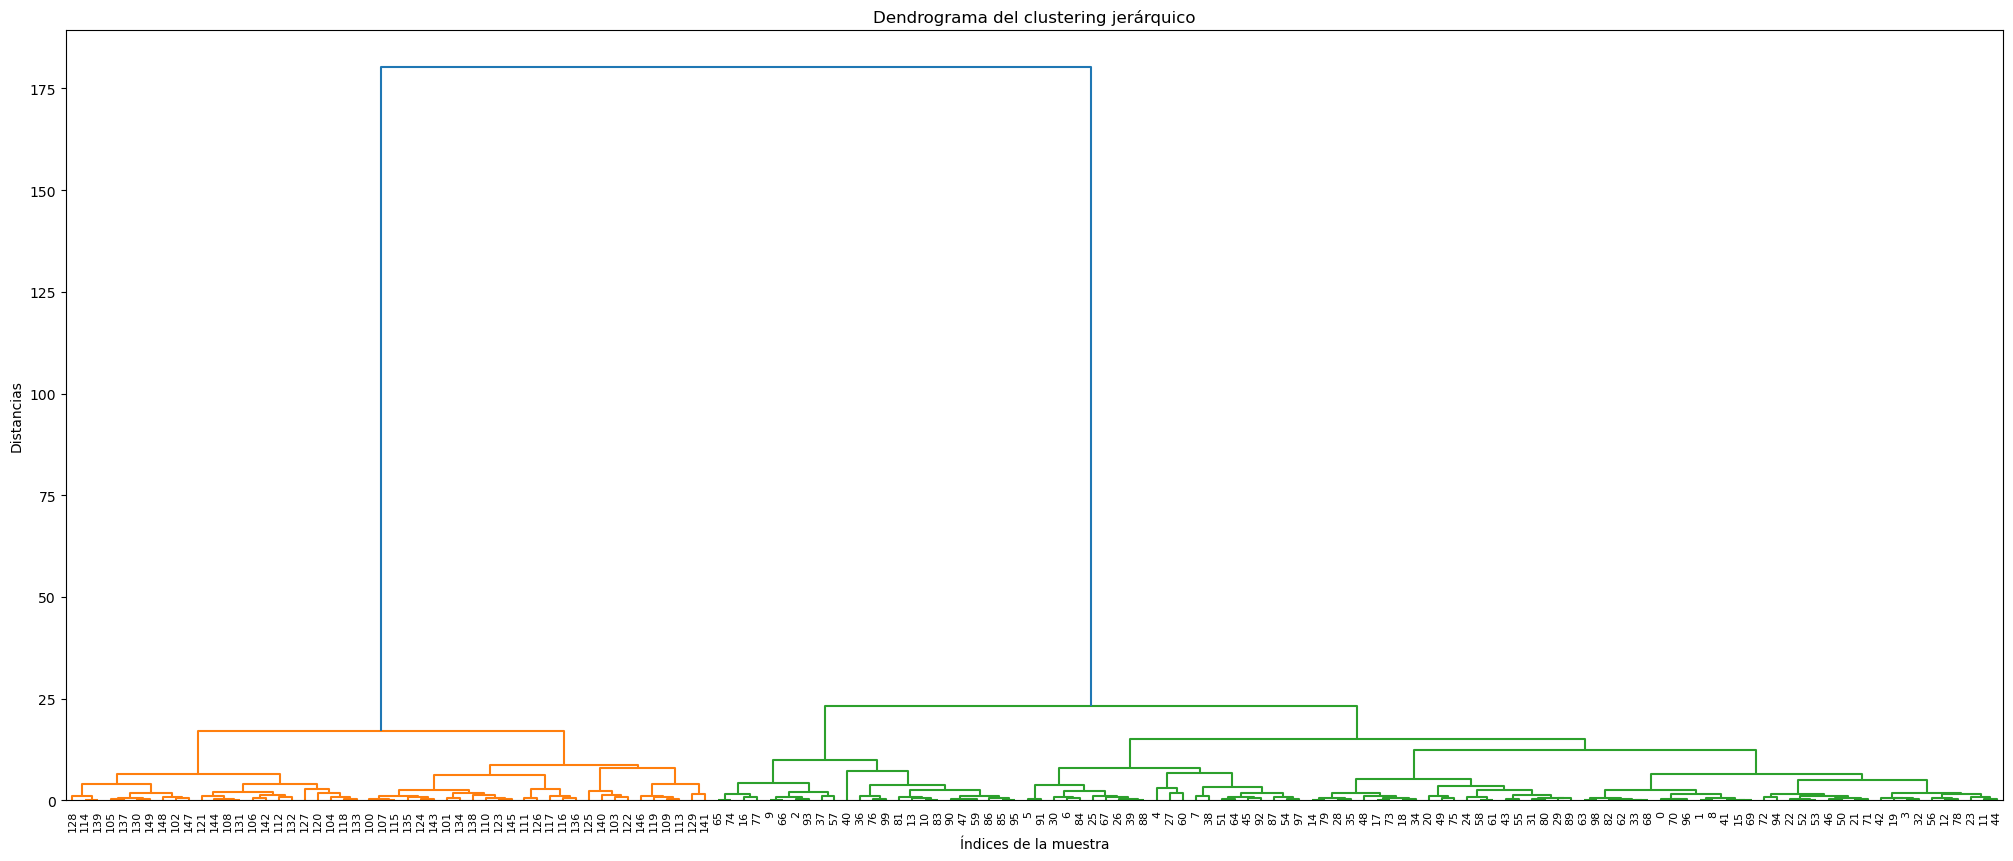

In [86]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

Se observa que la distancia a la que están los dos últimos clusters unidos (cluster 1 en naranja + cluster 2 en verde) es considerablemente grande. Se comprueba numéricamente para acompañar a su representación:

In [87]:
# últimas cuatro muestras de la matriz de distancias: la distancia de unión de estos dos clusters es de 180 
# mientras que la inmediatamente anterior y segunda más grande es de 23.
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

Se modifica la coloración de los clusters seteando el color threshold en una distancia mayor o igual 15: todos los clusters que estén a una distancia menor a 15 quedarán coloreados con el mismo color. Por defecto este threshold está configurado al 70% de la distancia máxima entre clusters de la matriz de distancias. De este modo se observarán estructuras de agrupaciones por color diferentes:

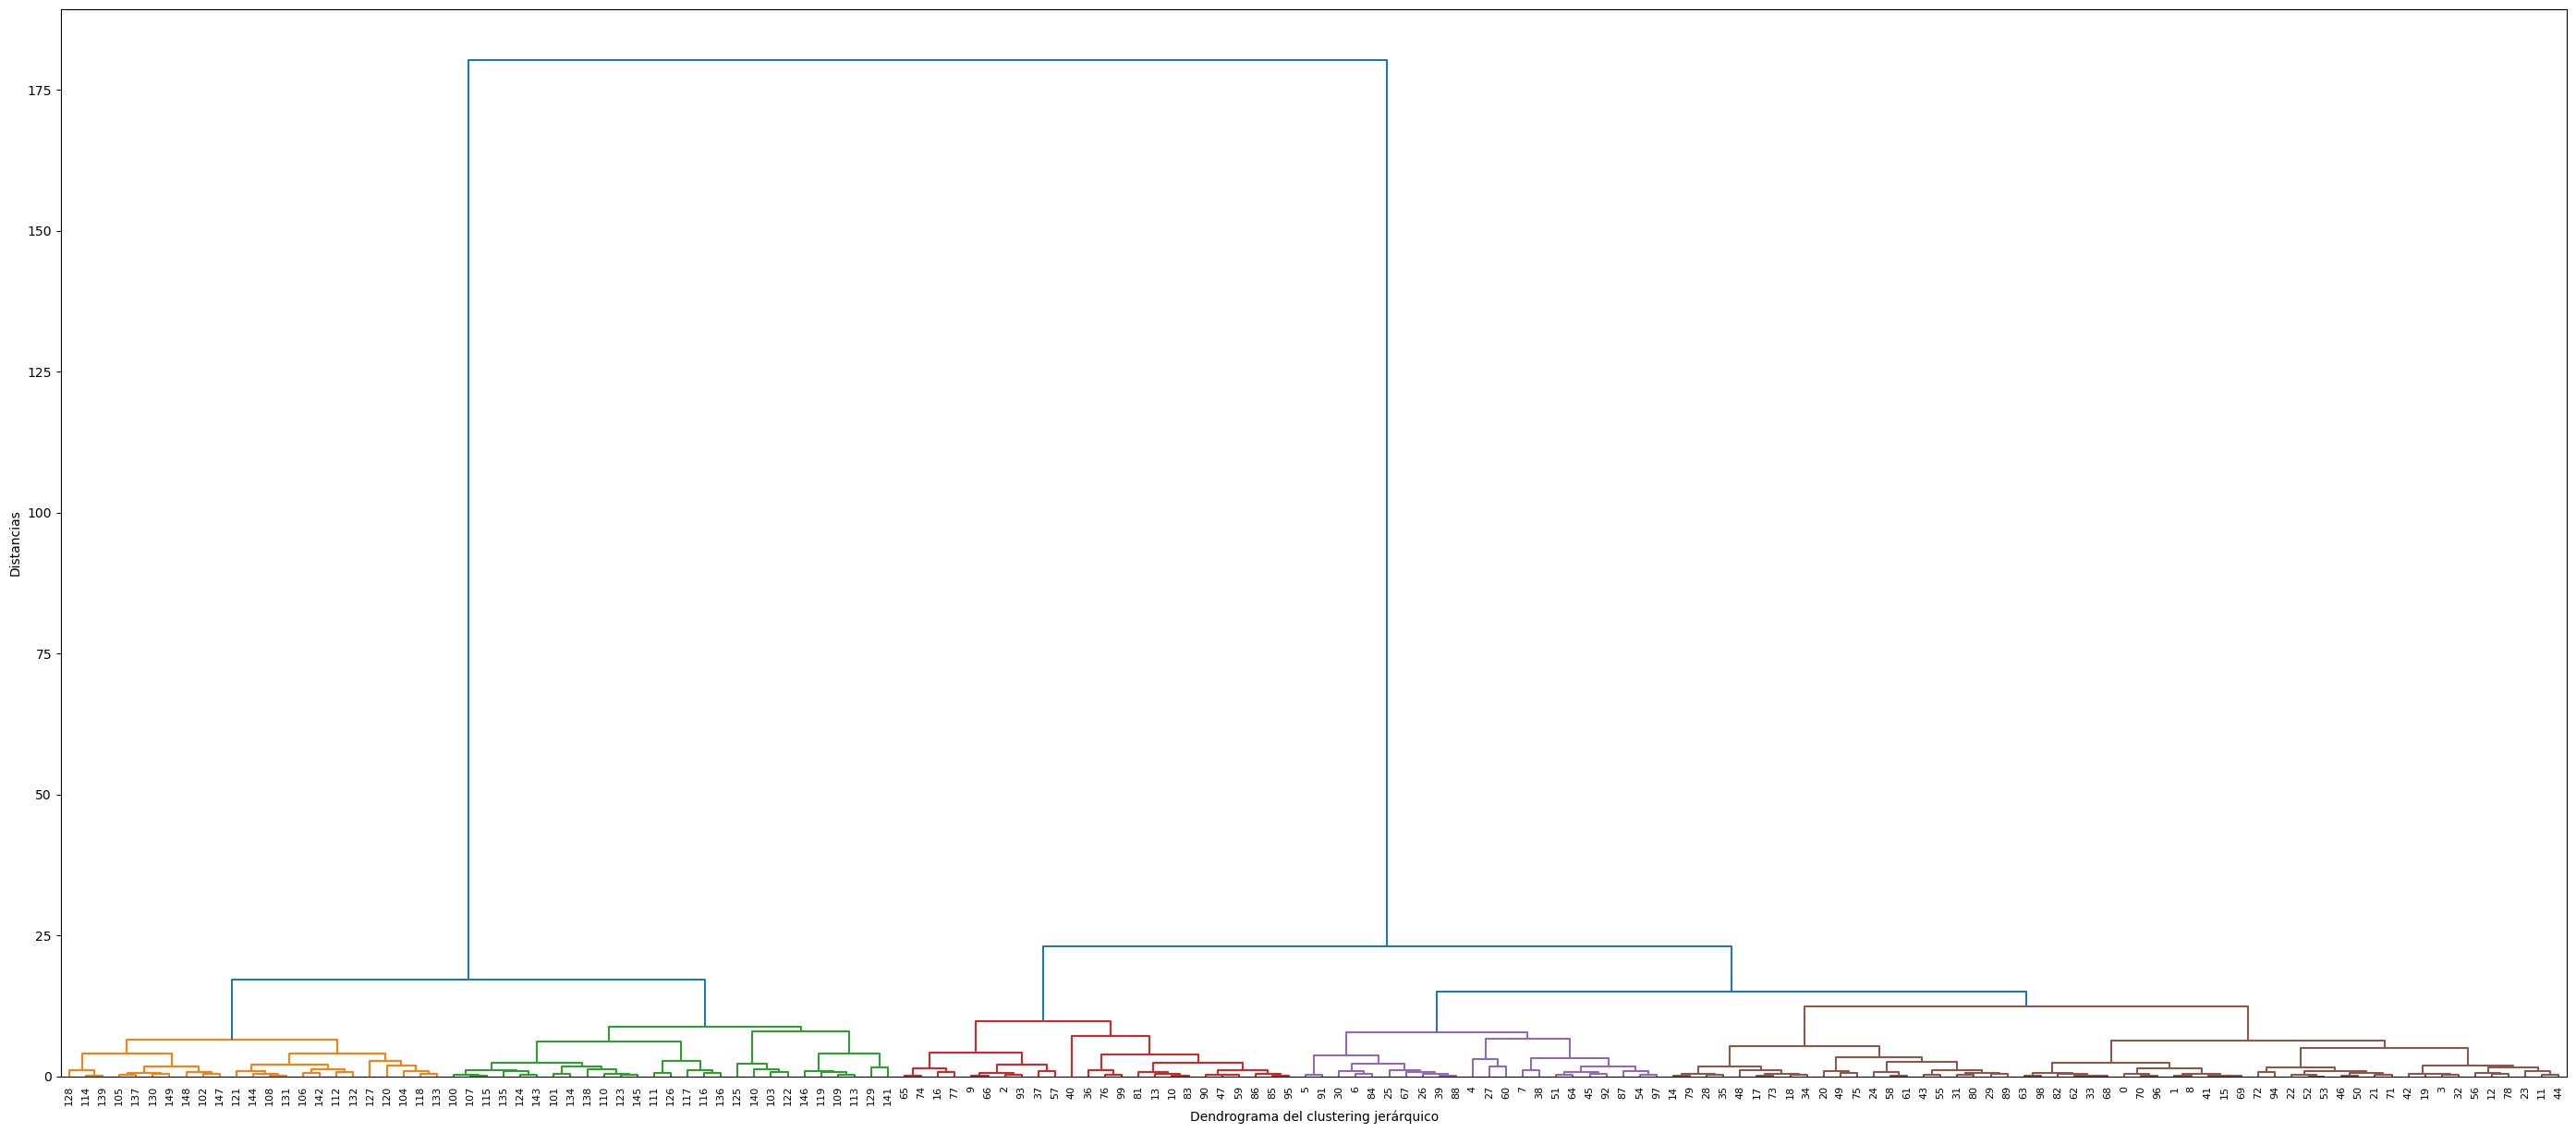

In [88]:
plt.figure(figsize=(35, 15))
plt.xlabel("Dendrograma del clustering jerárquico")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=15)
plt.show()

#### Truncamiento del dendrograma

Se representa también con truncamiento de agrupamientos para estilizar el plot y resumir información: mostrar solo los últimos p-clusters y hacerlo con los previos contraídos. El número de clusters contraídos se muestra entre paréntesis, mientras que los números sin paréntesis son simplemente los índices de las muestras correspondientes.

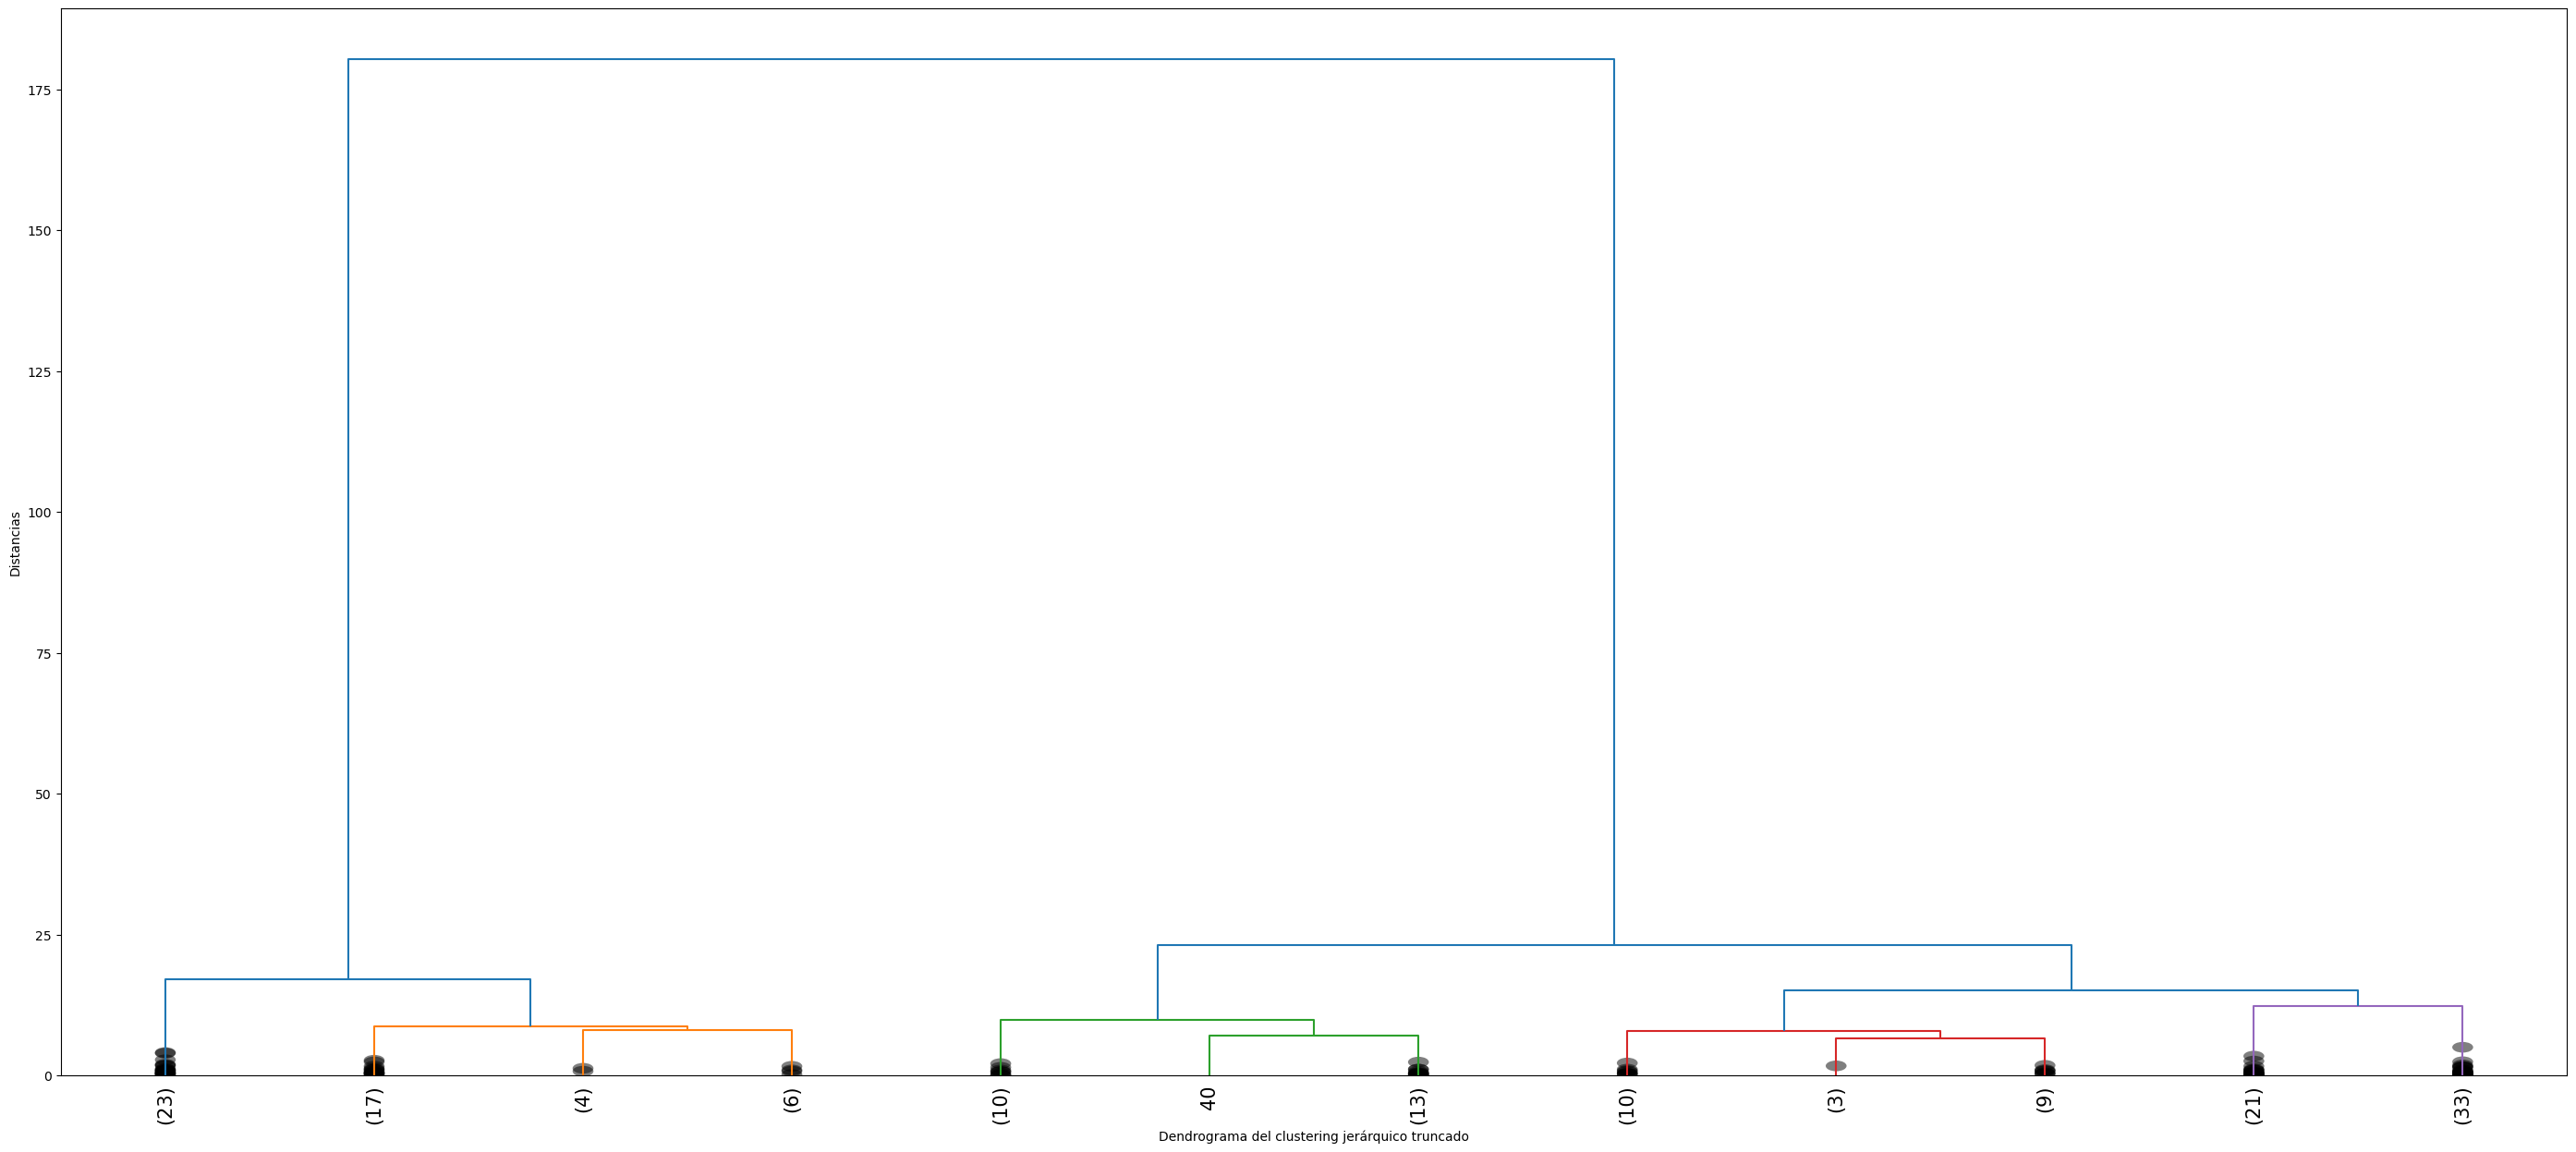

In [89]:
plt.figure(figsize=(35, 15))
plt.xlabel("Dendrograma del clustering jerárquico truncado")
plt.ylabel("Distancias")
dendrogram(Z, leaf_font_size=15, leaf_rotation=90., color_threshold=15,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True
          )
plt.show()

#### Dendograma personalizado con línea de corte de la distancia

In [90]:
def pdendrogram(*args, **kwargs):
    
    max_d = kwargs.pop("max_d", None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    
    annotate_above = kwargs.pop('annotate_above', 0)
    dend_data = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerárquico con dendrograma truncado')
        plt.xlabel("Índice del dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        
        for index, distance, color in zip(dend_data['icoord'], dend_data['dcoord'], dend_data['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1]
            
            if y > annotate_above:
                plt.plot(x,y,'o',c=color)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5), textcoords='offset points', va='top', ha='center')
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    
    return dend_data        

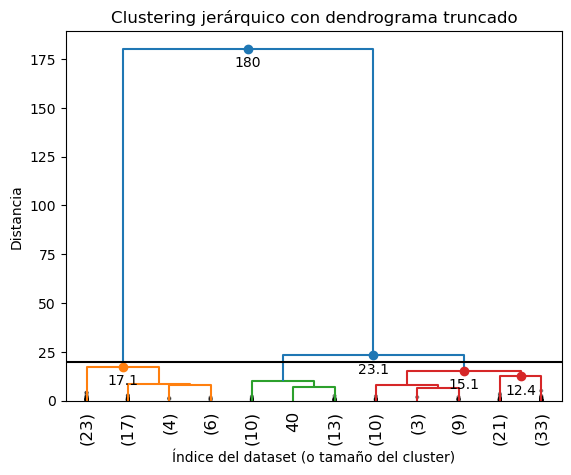

In [93]:
pdendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=20)
plt.show()

## Coeficiente de inconsistencia en scipy

Mediante el coeficiente de inconsistencia se puede establecer automáticamente el corte o el número óptimo de clusters. El coeficiente de inconsistencia compara la distancia o el peso de cada unión comparándola con el peso o distancia promedio del resto de uniones del mismo nivel jerárquico. Cuanto mayor sea el coeficiente, mayor es la distancia entre las muestras o clusters conectados por las uniones.

$  inconsistency_i = \large {\frac {(h_i - avg(h_j))}{std(h_j)}} $

Siendo

h: altura o distancia

avg: promedio

std: desviación estándar


In [95]:
# Calculate inconsistency statistics on a linkage matrix.
from scipy.cluster.hierarchy import inconsistent

In [97]:
# niveles por debajo de cada cluster no-singular
depth = 5
# matriz de inconsistencias: columna 1: promedio; columna 2: desviación estándar;
# columna 3: número de elementos; columna 4: factor de inconsistencia
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Elbow method/Método del codo para el establecimiento automático del número óptimo de clusters

El método consiste en graficar la variación o aceleración del crecimiento de la distancia entre uniones de clusters (steps) para determinar la mayor; es decir, el mayor codo generado por el crecimiento en la distancia entre uniones de clusters.

In [108]:
# se escogen las últimas 10 distancias entre clusters.
last = Z[-10:,2]
last

array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
         9.84427829,  12.42734657,  15.11533118,  17.11527362,
        23.12198936, 180.27043021])

In [109]:
# se ordenan de mayor a menor (orden decreciente)
last_dec = last[::-1]
last_dec

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


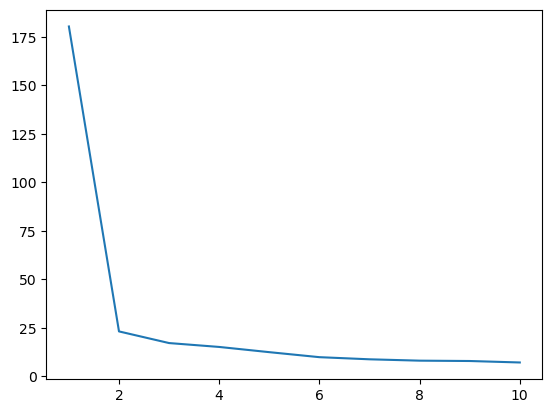

In [112]:
# índices para el eje de abscisas: tantas componentes como tiene el array de distancias escogidas
index = np.arange(1, len(last)+1)
print(last_dec)
# ploteo de las distancias
plt.plot(index, last_dec)
plt.show()

Últimas 10 distancias:  [180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]
Aceleraciones:  [ 1.51141725e+02  4.00677330e+00 -6.88042176e-01  1.04916333e-01
  1.48701273e+00  3.97185622e-01  5.18302524e-01 -5.77157189e-01]


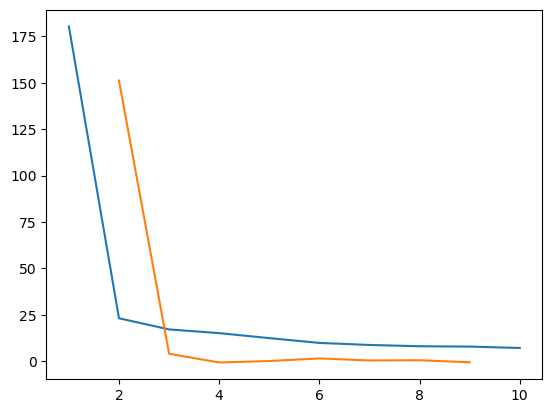

El número óptimo de clusters es  2  por la cola.


In [129]:
# ploteo de las distancias + aceleración

# índices para el eje de abscisas: tantas componentes como tiene el array de distancias escogidas
index = np.arange(1, len(last)+1)
print(f"Últimas {len(last)} distancias: ", last_dec)
# ploteo de las distancias
plt.plot(index, last_dec)

''' Método diff de numpy:

numpy.diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)

Calculate the n-th discrete difference along the given axis.
Se calcula la diferencia cogiendo los elementos de dos en dos.

'''

accelerations = np.diff(last,2)
accelerations_dec = accelerations[::-1]
print("Aceleraciones: ", accelerations_dec)
# ploteo: de la componente 2 a la 9 del vector para las abscisas
plt.plot(index[:-2]+1, accelerations_dec)
plt.show()


# argmax() devuelve los índices de los valores máximos a lo largo de un eje
k = accelerations_dec.argmax() + 2
print("El número óptimo de clusters es ", k, " por la cola.")